<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_10_Decision_Tree_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
# import some data to play with
CD  = pd.read_csv('Company_Data.csv')

In [5]:
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
CD.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [7]:
CD.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
CD.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
CD.shape

(400, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


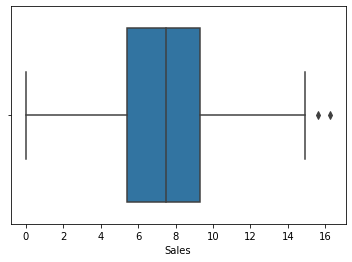

In [10]:
sns.boxplot(CD['Sales'])

there are oultiers in the sales data 

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


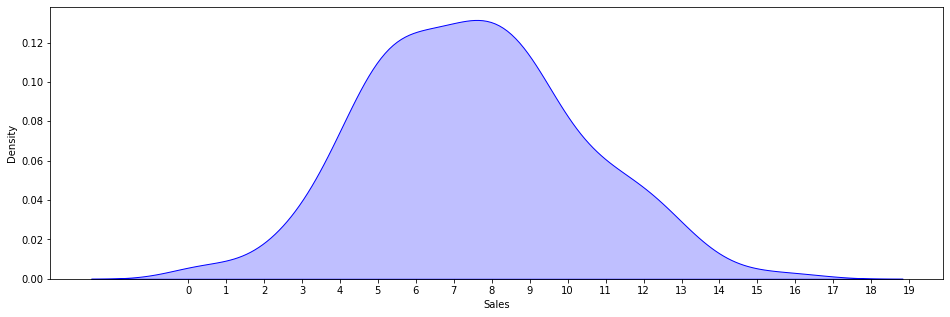

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(CD['Sales'].skew()))
print("Kurtosis: {}".format(CD['Sales'].kurtosis()))
ax = sns.kdeplot(CD['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skwed on the right 

The data has negative Kurtosis,which means the distribution has more values in the tails compared to a normal distribution.

In [13]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
CD1 = CD[['ShelveLoc', 'Urban','US']].apply(label.fit_transform)
CD1.head()

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [14]:
CD = CD.drop(columns={'ShelveLoc','Urban','US'},axis=1)

In [15]:
CD = pd.concat([CD,CD1], axis=1, sort=False)
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,1
2,10.06,113,35,10,269,80,59,12,2,1,1
3,7.40,117,100,4,466,97,55,14,2,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


In [16]:
corr = CD.corr()

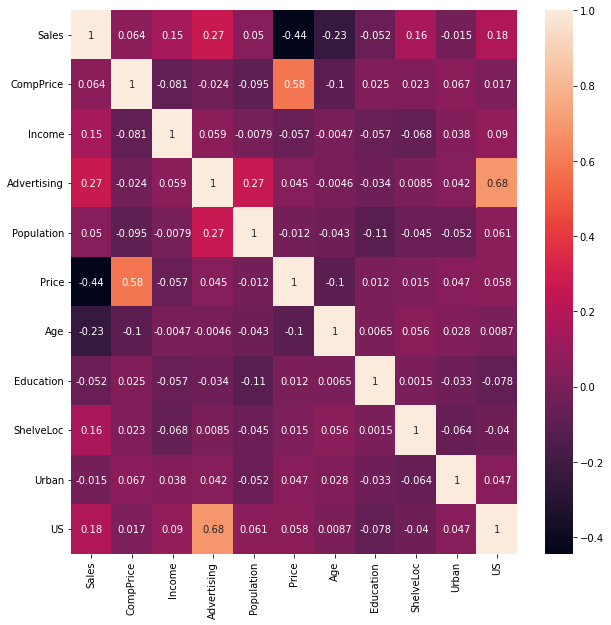

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

From the heat map we can interpret that the CompPrice(competitor price) and sales are positive related i.e if the local competitor increases his price the sales will also increase 

the price and sales are negative related i.e if the the price is increased the sales will decrease 

In [18]:
#first convert sales into categorical variable
CD['Sales_Rating'] = pd.cut(CD.Sales,bins=[0,3,6,10,14,20],
                                      labels=['Bad','Below_Avg','Avg','Good','Excellent'],include_lowest=True)

In [19]:
CD = CD.drop(columns={'Sales'},axis=1)
CD

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US,Sales_Rating
0,138,73,11,276,120,42,17,0,1,1,Avg
1,111,48,16,260,83,65,10,1,1,1,Good
2,113,35,10,269,80,59,12,2,1,1,Good
3,117,100,4,466,97,55,14,2,1,1,Avg
4,141,64,3,340,128,38,13,0,1,0,Below_Avg
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1,Good
396,139,23,3,37,120,55,11,2,0,1,Avg
397,162,26,12,368,159,40,18,2,1,1,Avg
398,100,79,7,284,95,50,12,0,1,1,Below_Avg


In [20]:
colnames=list(CD.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc',
 'Urban',
 'US',
 'Sales_Rating']

In [21]:
x=CD.iloc[:,0:10]
y=CD["Sales_Rating"]

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


In [23]:
y

0            Avg
1           Good
2           Good
3            Avg
4      Below_Avg
         ...    
395         Good
396          Avg
397          Avg
398    Below_Avg
399          Avg
Name: Sales_Rating, Length: 400, dtype: category
Categories (5, object): ['Bad' < 'Below_Avg' < 'Avg' < 'Good' < 'Excellent']

In [24]:
CD.isnull().any()

CompPrice       False
Income          False
Advertising     False
Population      False
Price           False
Age             False
Education       False
ShelveLoc       False
Urban           False
US              False
Sales_Rating    False
dtype: bool

In [25]:
# Splitting CD training and testing CDset
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

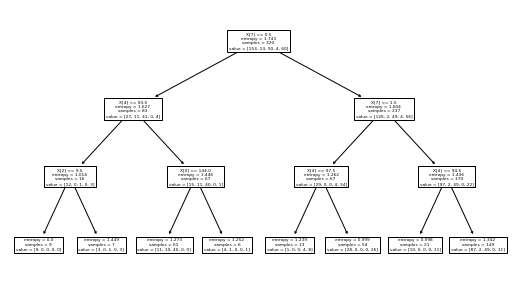

In [27]:
#PLot the decision tree
tree.plot_tree(model);


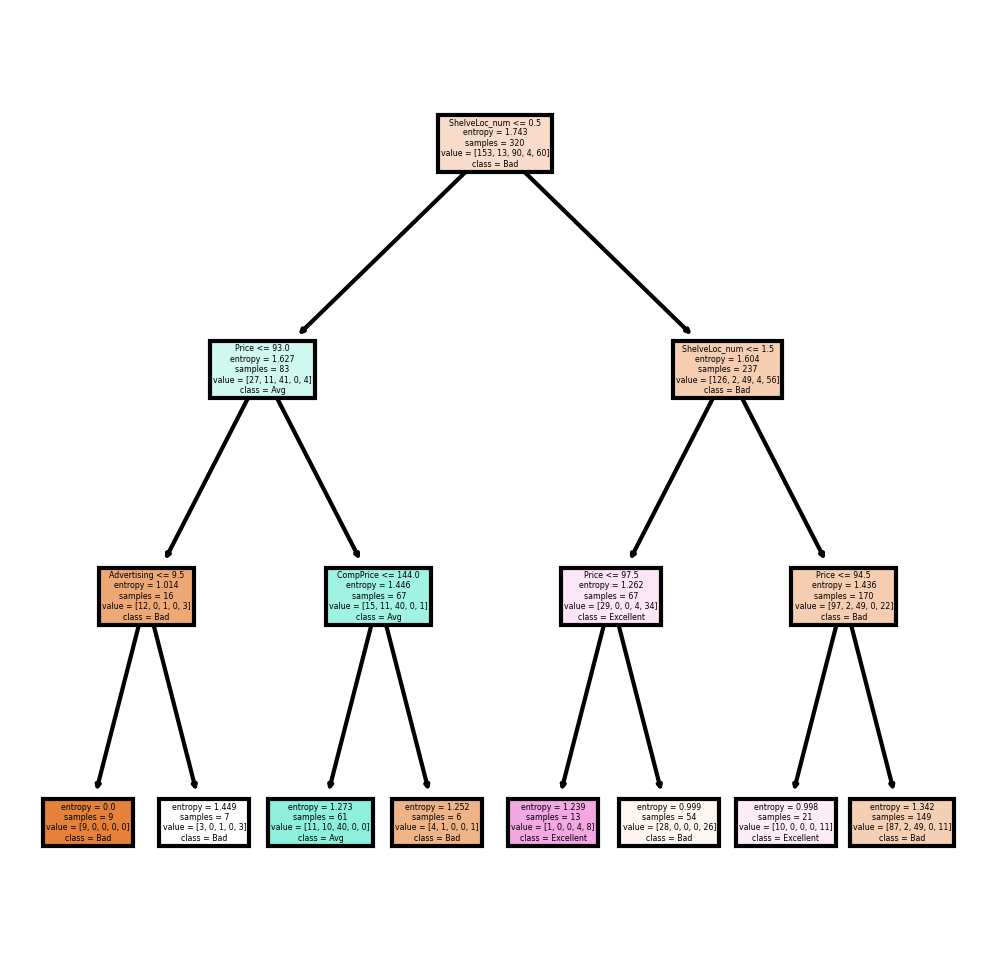

In [28]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_num', 'Urban_num', 'US_num']
cn=['Bad' , 'Below_Avg' , 'Avg' , 'Good' , 'Excellent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
#Predicting on test CD
preds = model.predict(x_test) # predicting on test CDset 
pd.Series(preds).value_counts() # getting the count of each category 

Avg          54
Good         18
Below_Avg     8
dtype: int64

In [30]:
preds

array(['Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Good', 'Avg',
       'Good', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg', 'Avg',
       'Avg', 'Avg', 'Avg', 'Good', 'Good', 'Avg', 'Avg', 'Avg', 'Avg',
       'Avg', 'Below_Avg', 'Avg', 'Avg', 'Good', 'Avg', 'Good', 'Avg',
       'Avg', 'Good', 'Avg', 'Below_Avg', 'Avg', 'Avg', 'Avg',
       'Below_Avg', 'Avg', 'Good', 'Avg', 'Avg', 'Below_Avg', 'Avg',
       'Avg', 'Avg', 'Avg', 'Avg', 'Good', 'Good', 'Avg', 'Good', 'Avg',
       'Good', 'Avg', 'Below_Avg', 'Avg', 'Avg', 'Good', 'Avg',
       'Below_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Good', 'Good', 'Good',
       'Good', 'Avg', 'Good', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg'],
      dtype=object)

In [31]:
pd.crosstab(preds,y_test) # getting the 2 way table to understand the correct and wrong predictions

Sales_Rating,Bad,Below_Avg,Avg,Good
row_0,,,,
Avg,3,18,28,5
Below_Avg,1,5,2,0
Good,0,0,9,9


In [32]:
# Accuracy 
np.mean(preds==y_test)

0.525

### Building Decision Tree Classifier (CART) using Gini Criteria

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
#Prediction and computing the accuracy
pred_gini=model_gini.predict(x_test)
np.mean(pred_gini==y_test)

0.5625

In [39]:
model.feature_importances_

array([0.06852209, 0.        , 0.03545142, 0.        , 0.34787772,
       0.        , 0.        , 0.54814878, 0.        , 0.        ])

In [40]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
7,ShelveLoc,0.548149
4,Price,0.347878
0,CompPrice,0.068522
2,Advertising,0.035451
1,Income,0.000000
3,Population,0.000000
5,Age,0.000000
6,Education,0.000000
8,Urban,0.000000
9,US,0.000000


As seen in the above table Price & ShelveLoc are very important features